tomar una muestra de los datos

In [60]:
import os
import glob
import random
import pandas as pd

def list_xls_files(directory):
    return glob.glob(os.path.join(directory, "*.xls"))

def load_xls_file(file_list, file_index=None):
    if not file_list:
        print("Files not found XLS.")
        return None

    if file_index is None:
        selected_file = random.choice(file_list)
    else:
        selected_file = file_list[file_index]

    print(f"Selected file: {selected_file}")
    return pd.read_excel(selected_file)

# Managed directory
notebook_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

directory = os.path.join(project_root, 'data', 'forecast_data')

xls_files = list_xls_files(directory)

#select file
file_index = 5

if file_index:
    file_index = int(file_index)
    df = load_xls_file(xls_files, file_index)
else:
    df = load_xls_file(xls_files)

if df is not None:
    display(df)


Archivo seleccionado: c:\Users\XMF2858_1\Documents\DS_globandt_test\data\forecast_data\cusersfinainmndesktoppublish-spend-july-2017.xls


,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2017-07-19,VR,78.82,GBP,78.82,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
1,2017-08-01,VR,64.77,GBP,64.77,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
2,2017-07-24,VR,58.33,GBP,58.33,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
3,2017-07-24,VR,60.00,GBP,60.00,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
4,2017-07-21,VR,52.11,GBP,52.11,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136,2017-07-08,VR,106.00,GBP,106.00,GBP,travelodge gb0000,************7751,N060,Other Third Parties,RJADC,Homeless Private Sector Accom,A00,Local Services
5137,2017-08-02,VR,56.00,GBP,56.00,GBP,travelodge gb0000,************7751,N060,Other Third Parties,RJADC,Homeless Private Sector Accom,A00,Local Services
5138,2017-08-02,VR,52.00,GBP,52.00,GBP,travelodge gb0000,************7751,N060,Other Third Parties,RJADC,Homeless Private Sector Accom,A00,Local Services
5139,2017-07-28,VR,160.00,GBP,160.00,GBP,travelodge gb0000,************7751,N060,Other Third Parties,RJADC,Homeless Private Sector Accom,A00,Local Services


convinar los datos en un df para su analisis

In [62]:
import pandas as pd
import os

# Managed directory
notebook_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

data_folder = os.path.join(project_root, 'data', 'forecast_data')

# list of xls

xls_files = [f for f in os.listdir(data_folder) if f.endswith('.xls')]

dataframes = []

# Initialize a set to collect all column names
all_columns = set()

# Function to normalize column names
def normalize_columns(columns):
    normalized_columns = []
    for col in columns:
        if isinstance(col, str):
            normalized_columns.append(col.strip().lower().replace(' ', '_'))
        else:
            normalized_columns.append(col)
    return normalized_columns

# Load and normalize XLS files
for file in xls_files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_excel(file_path)
    df.columns = normalize_columns(df.columns)
    dataframes.append(df)
    all_columns.update(df.columns)

all_columns = list(all_columns)

# Function to ensure all columns are present in each DataFrame
def ensure_all_columns(df, all_columns):
    for col in all_columns:
        if col not in df.columns:
            df[col] = pd.NA
    return df[all_columns]

# apply function to every df
dataframes = [ensure_all_columns(df, all_columns) for df in dataframes]

# merge data 
combined_df = pd.concat(dataframes, ignore_index=True)

print(combined_df.info())


C:\Users\XMF2858_1\AppData\Local\Temp\ipykernel_13784\922929779.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dataframes, ignore_index=True)
C:\Users\XMF2858_1\AppData\Local\Temp\ipykernel_13784\922929779.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dataframes, ignore_index=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458193 entries, 0 to 458192
Data columns (total 68 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   trans_cac_code_10                0 non-null       object        
 1   0                                4460 non-null    object        
 2   claim_no                         8182 non-null    object        
 3   trans_tax_desc                   216548 non-null  object        
 4   trans_original_net_amt           157783 non-null  float64       
 5   75.1                             4460 non-null    object        
 6   trans_cac_code_6                 98984 non-null   object        
 7   trans_cac_code_4                 99039 non-null   object        
 8   a00                              4456 non-null    object        
 9   split_quantity                   0 non-null       object        
 10  2018-09-18 00:00:00              4460 non-nu

guardar el df combinado

In [63]:
import pandas as pd
import os
from pathlib import Path

notebook_path = Path().resolve()

output_dir = notebook_path.parents[0] / 'data/source'

if not output_dir.exists():
    os.makedirs(output_dir)

output_path = output_dir / 'datos1.csv'
combined_df.to_csv(output_path, index=False)


filtrar datos combinados 

In [64]:
import pandas as pd
from pathlib import Path

notebook_path = Path().resolve()

csv_path = notebook_path.parents[0] / 'data/source/datos1.csv'

df = pd.read_csv(csv_path)

non_null_counts = df.notnull().sum()

#Select columns that have more than 10,000 non-null records
columns_with_many_non_nulls = non_null_counts[non_null_counts > 10000].index.tolist()

# Filter the DataFrame to keep only those columns
df_filtered = df[columns_with_many_non_nulls]

print("Columnas con más de 10,000 registros no nulos:", columns_with_many_non_nulls)

df_filtered


C:\Users\XMF2858_1\AppData\Local\Temp\ipykernel_13784\786479422.py:11: DtypeWarning: Columns (1,3,5,6,7,8,10,12,15,16,20,22,24,25,26,27,28,29,31,34,38,39,41,42,43,44,45,46,47,48,49,50,52,53,55,61,62,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Columnas con más de 10,000 registros no nulos: ['trans_tax_desc', 'trans_original_net_amt', 'trans_cac_code_6', 'trans_cac_code_4', 'trans_cac_code_8', 'card_number', 'trans_vat_desc', 'original_cur', 'original_gross_amt', 'directorate', 'billing_cur_code.1', 'trans_tax_rate', 'billing_cur_code', 'billing_gross_amt', 'trans_tax_amt', 'merchant_name', 'trans_cac_code_7', 'trans_cac_desc_1', 'trans_cac_code_5', 'directorates', 'trans_cac_desc_3', 'trans_cac_desc_2', 'trans_cac_code_1', 'trans_cac_code_3', 'trans_cac_code_2', 'trans_date']


,trans_tax_desc,trans_original_net_amt,trans_cac_code_6,trans_cac_code_4,trans_cac_code_8,card_number,trans_vat_desc,original_cur,original_gross_amt,directorate,...,trans_cac_code_7,trans_cac_desc_1,trans_cac_code_5,directorates,trans_cac_desc_3,trans_cac_desc_2,trans_cac_code_1,trans_cac_code_3,trans_cac_code_2,trans_date
0,NaN,NaN,NaN,NaN,NaN,************5770,VR,GBP,72.61,Adult & Communities,...,NaN,Vehicle Fuel,NaN,NaN,NaN,African-Caribbean DC,K020,A00,RV12N,2017-01-03
1,NaN,NaN,NaN,NaN,NaN,************1147,VR,GBP,85.51,Adult & Communities,...,NaN,Vehicle Fuel,NaN,NaN,NaN,Elders Group - Ladywood,K020,A00,RV1K2,2017-01-24
2,NaN,NaN,NaN,NaN,NaN,************1147,VR,GBP,10.09,Adult & Communities,...,NaN,Vehicle Fuel,NaN,NaN,NaN,Elders Group - Ladywood,K020,A00,RV1K2,2017-02-01
3,NaN,NaN,NaN,NaN,NaN,************5804,VR,GBP,20.00,Adult & Communities,...,NaN,Vehicle Fuel,NaN,NaN,NaN,Enablement Tyburn Rd,K020,A00,RVA12,2017-01-04
4,NaN,NaN,NaN,NaN,NaN,************5804,VR,GBP,50.00,Adult & Communities,...,NaN,Vehicle Fuel,NaN,NaN,NaN,Enablement Tyburn Rd,K020,A00,RVA12,2017-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458188,NaN,NaN,NaN,NaN,NaN,************4599,VR,NaN,52.57,Local Services,...,NaN,Vehicle Fuel,NaN,NaN,NaN,Careline,K020,A00,RHNCA,2015-05-11
458189,NaN,NaN,NaN,NaN,NaN,************4599,VR,NaN,61.93,Local Services,...,NaN,Vehicle Fuel,NaN,NaN,NaN,Careline,K020,A00,RHNCA,2015-06-01
458190,NaN,NaN,NaN,NaN,NaN,************6665,VR,NaN,78.18,Local Services,...,NaN,Vehicle Fuel,NaN,NaN,NaN,Ladywood CBH05 Neigh C'takers,K020,A00,RHEE7,2015-05-06
458191,NaN,NaN,NaN,NaN,NaN,************6665,VR,NaN,27.01,Local Services,...,NaN,Vehicle Fuel,NaN,NaN,NaN,Ladywood CBH05 Neigh C'takers,K020,A00,RHEE7,2015-05-08


guardar el df filtrado en un csv

In [65]:
output_csv_path = notebook_path.parents[0] / 'data/source/datos2.csv'

df_filtered.to_csv(output_csv_path, index=False)



In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458193 entries, 0 to 458192
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   trans_cac_desc_3        14166 non-null   object 
 1   merchant_name           449399 non-null  object 
 2   original_gross_amt      453731 non-null  float64
 3   trans_original_net_amt  157783 non-null  float64
 4   trans_tax_desc          216548 non-null  object 
 5   trans_cac_code_1        453214 non-null  object 
 6   trans_tax_rate          105559 non-null  float64
 7   directorates            12150 non-null   object 
 8   billing_cur_code        348243 non-null  object 
 9   card_number             453731 non-null  object 
 10  billing_cur_code.1      25263 non-null   object 
 11  original_cur            322052 non-null  object 
 12  trans_cac_code_4        99039 non-null   object 
 13  directorate             435480 non-null  object 
 14  trans_cac_code_2    

In [77]:
df

,trans_tax_desc,trans_original_net_amt,trans_cac_code_6,trans_cac_code_4,trans_cac_code_8,card_number,trans_vat_desc,original_cur,original_gross_amt,directorate,...,trans_cac_desc_3,trans_cac_desc_2,trans_cac_code_1,trans_cac_code_3,trans_cac_code_2,trans_date,year,month,anomaly,cluster
0,NaN,123.75158,NaN,NaN,NaN,************5770,VR,GBP,72.61,Adult & Communities,...,NaN,African-Caribbean DC,K020,A00,RV12N,2017-01-03,2017.0,1.0,1,0
1,NaN,123.75158,NaN,NaN,NaN,************1147,VR,GBP,85.51,Adult & Communities,...,NaN,Elders Group - Ladywood,K020,A00,RV1K2,2017-01-24,2017.0,1.0,1,0
2,NaN,123.75158,NaN,NaN,NaN,************1147,VR,GBP,10.09,Adult & Communities,...,NaN,Elders Group - Ladywood,K020,A00,RV1K2,2017-02-01,2017.0,2.0,1,0
3,NaN,123.75158,NaN,NaN,NaN,************5804,VR,GBP,20.00,Adult & Communities,...,NaN,Enablement Tyburn Rd,K020,A00,RVA12,2017-01-04,2017.0,1.0,1,0
4,NaN,123.75158,NaN,NaN,NaN,************5804,VR,GBP,50.00,Adult & Communities,...,NaN,Enablement Tyburn Rd,K020,A00,RVA12,2017-01-05,2017.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458188,NaN,123.75158,NaN,NaN,NaN,************4599,VR,NaN,52.57,Local Services,...,NaN,Careline,K020,A00,RHNCA,2015-05-11,2015.0,5.0,1,0
458189,NaN,123.75158,NaN,NaN,NaN,************4599,VR,NaN,61.93,Local Services,...,NaN,Careline,K020,A00,RHNCA,2015-06-01,2015.0,6.0,1,0
458190,NaN,123.75158,NaN,NaN,NaN,************6665,VR,NaN,78.18,Local Services,...,NaN,Ladywood CBH05 Neigh C'takers,K020,A00,RHEE7,2015-05-06,2015.0,5.0,1,0
458191,NaN,123.75158,NaN,NaN,NaN,************6665,VR,NaN,27.01,Local Services,...,NaN,Ladywood CBH05 Neigh C'takers,K020,A00,RHEE7,2015-05-08,2015.0,5.0,1,0


EDA

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.ensemble import IsolationForest
# Manage Paths
notebook_path = Path().resolve()

csv_path = notebook_path.parents[0] / 'data/source/datos2.csv'

df = pd.read_csv(csv_path)

# Convert dates
df['trans_date'] = pd.to_datetime(df['trans_date'], errors='coerce')

# Identify numeric columuns
numerical_columns = df.select_dtypes(include=['float64']).columns



C:\Users\XMF2858_1\AppData\Local\Temp\ipykernel_13784\1180576659.py:14: DtypeWarning: Columns (0,2,3,4,7,10,12,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [81]:
# Stats
print(df.describe())

       trans_original_net_amt  original_gross_amt  trans_tax_rate  \
count           157783.000000       453731.000000   105559.000000   
mean               123.751580          145.048554       11.258201   
min             -16992.300000      -486980.090000        0.000000   
25%                 14.610000           14.360000        0.000000   
50%                 42.830000           43.420000       20.000000   
75%                 90.770000           95.490000       20.000000   
max             403000.000000       403000.000000       20.000000   
std               1151.622454         1686.918212        9.840957   

       billing_gross_amt  trans_tax_amt                     trans_date  
count      298382.000000  192268.000000                         453731  
mean          134.361390       8.979361  2019-03-26 03:11:28.872481280  
min       -486980.090000    -760.000000            2013-11-12 00:00:00  
25%            15.000000       0.000000            2016-08-30 00:00:00  
50%          

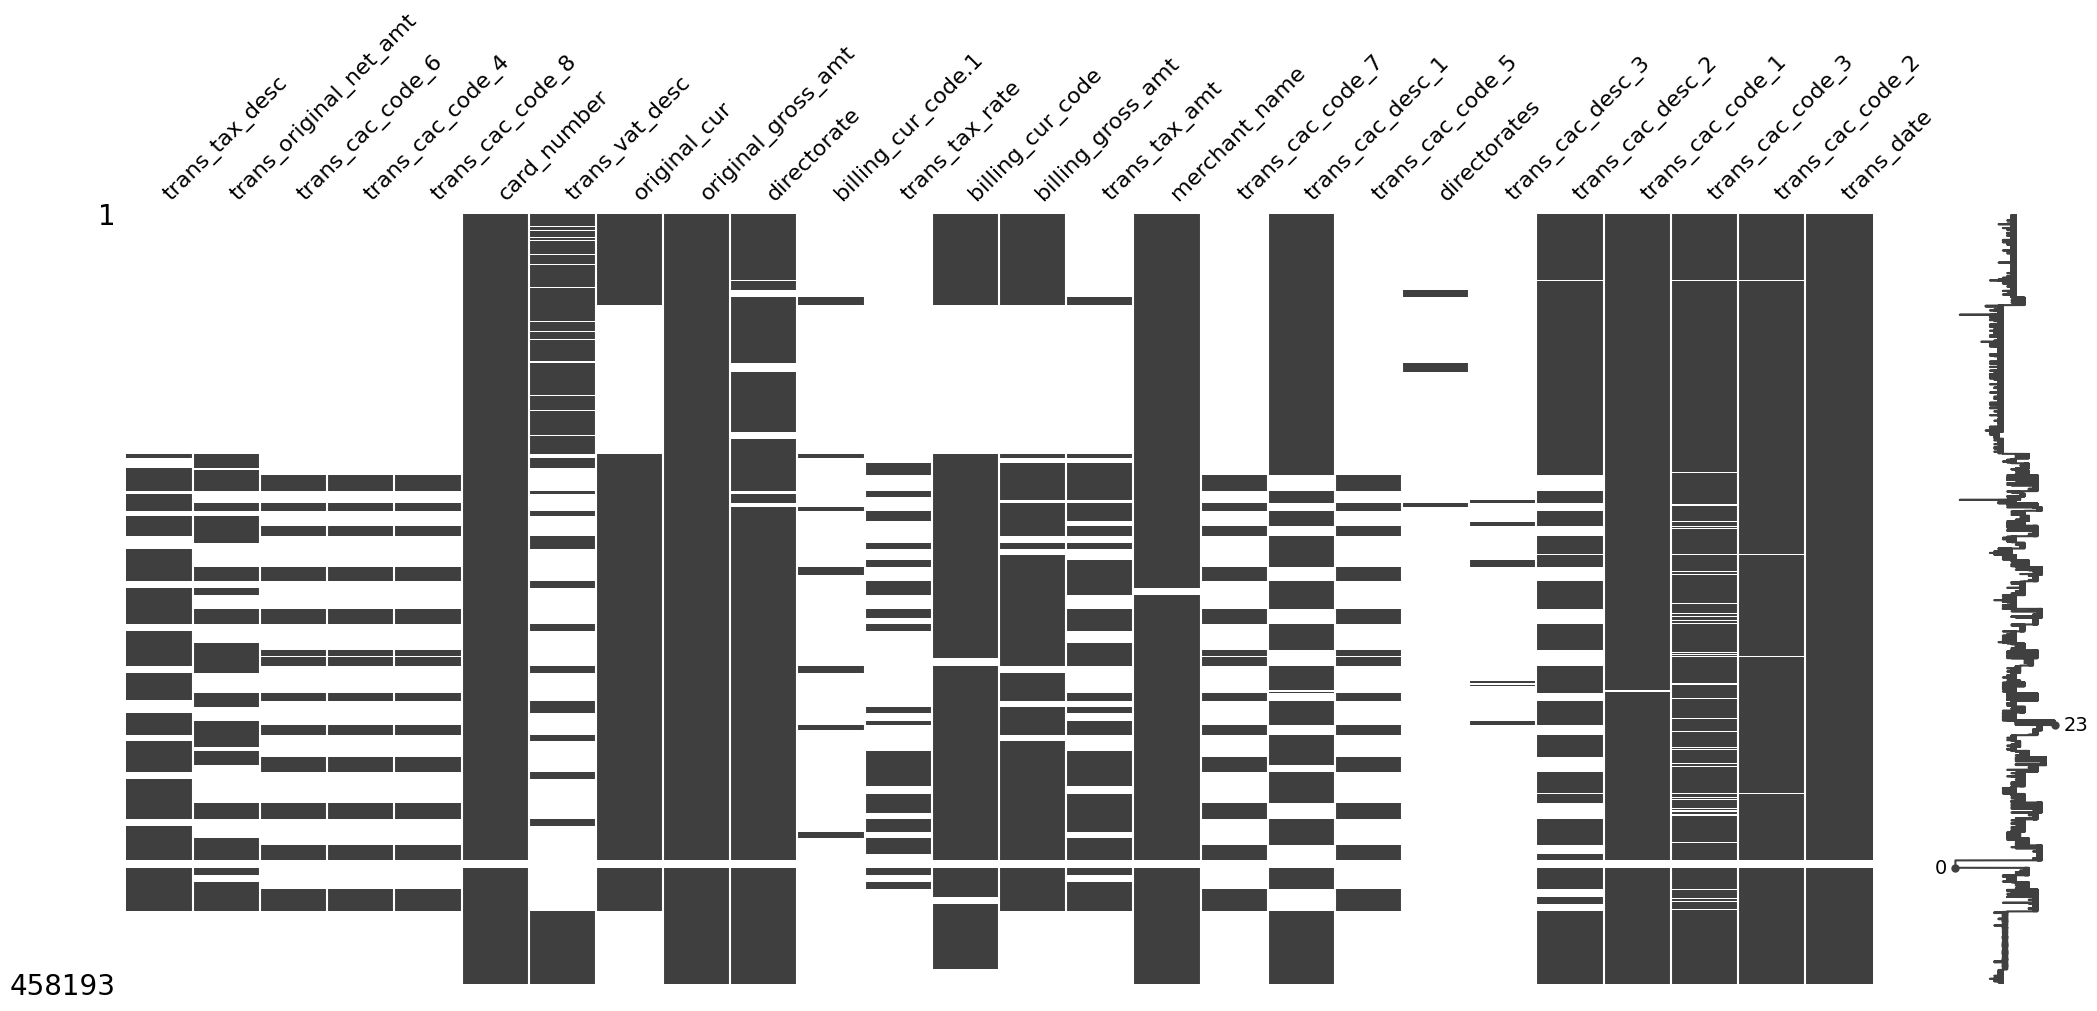

In [97]:

# missing values
msno.matrix(df)
plt.show()

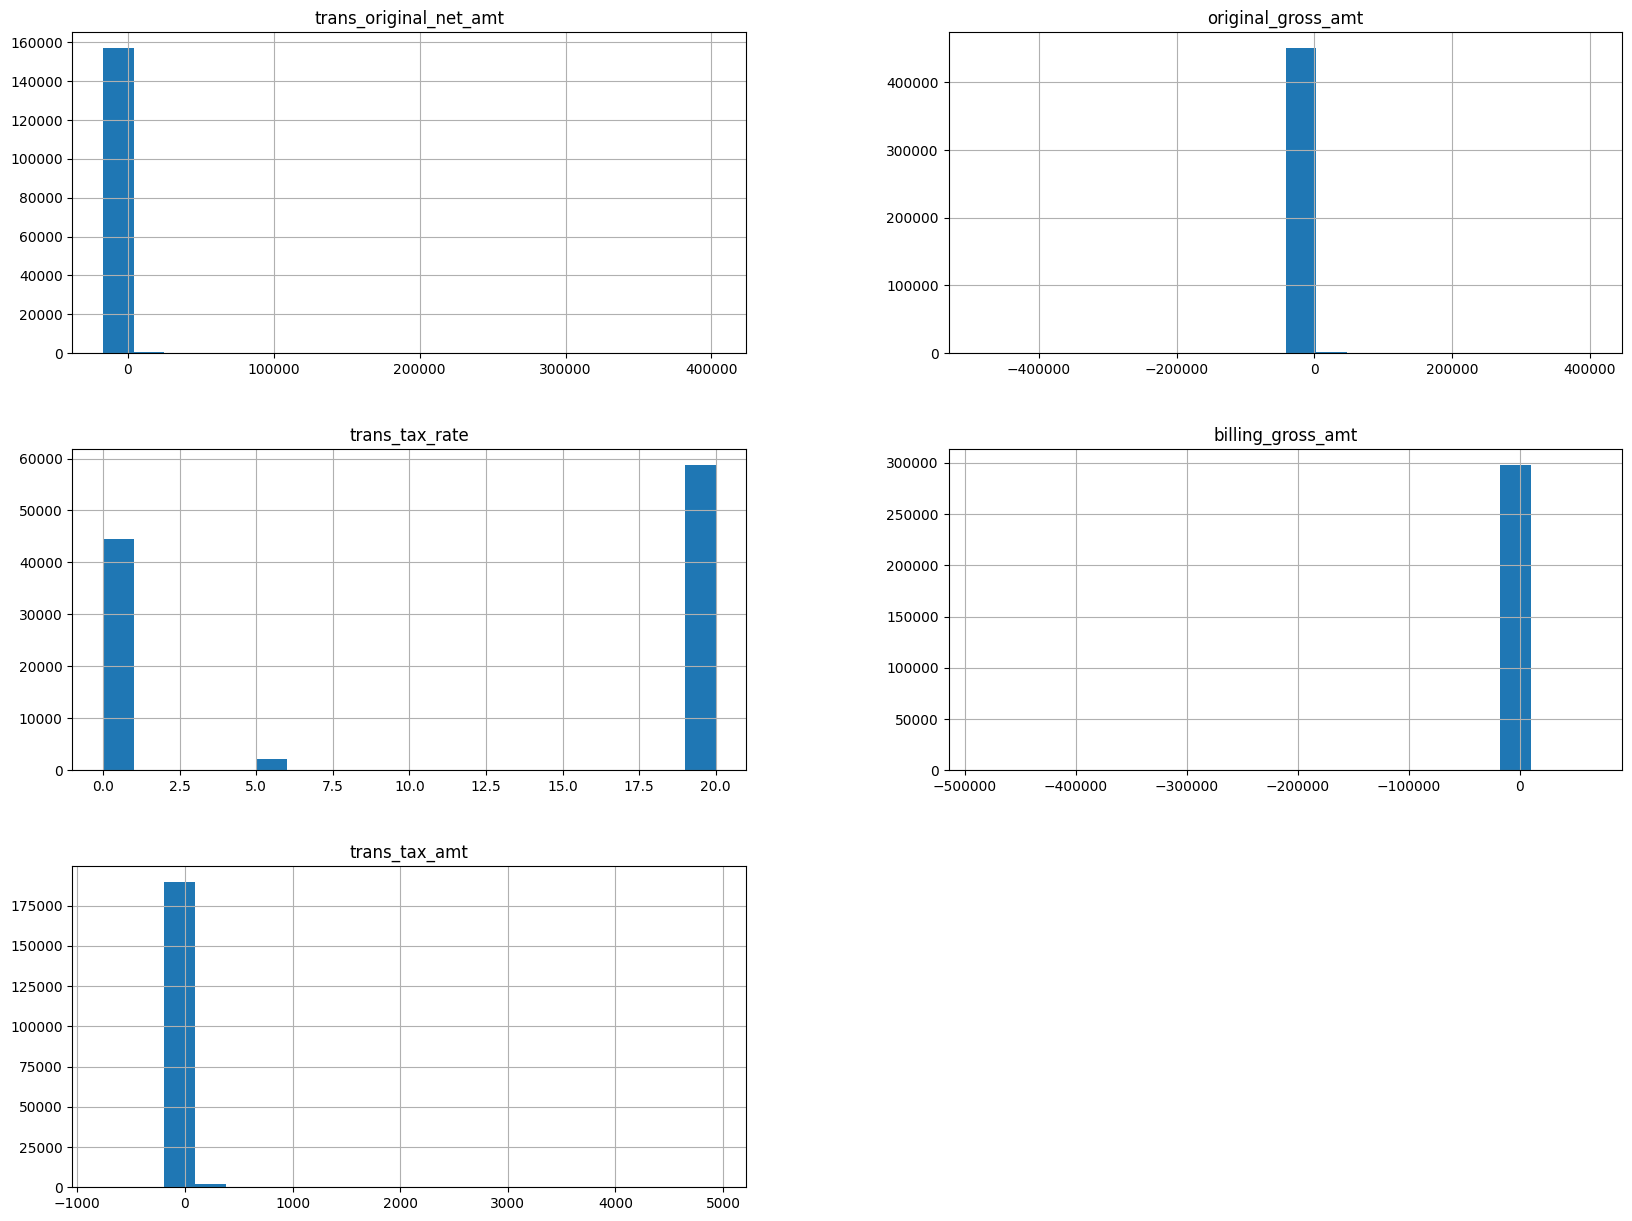

In [98]:
# Histogram for numeric variables
df[numerical_columns].hist(bins=20, figsize=(20, 15))
plt.show()



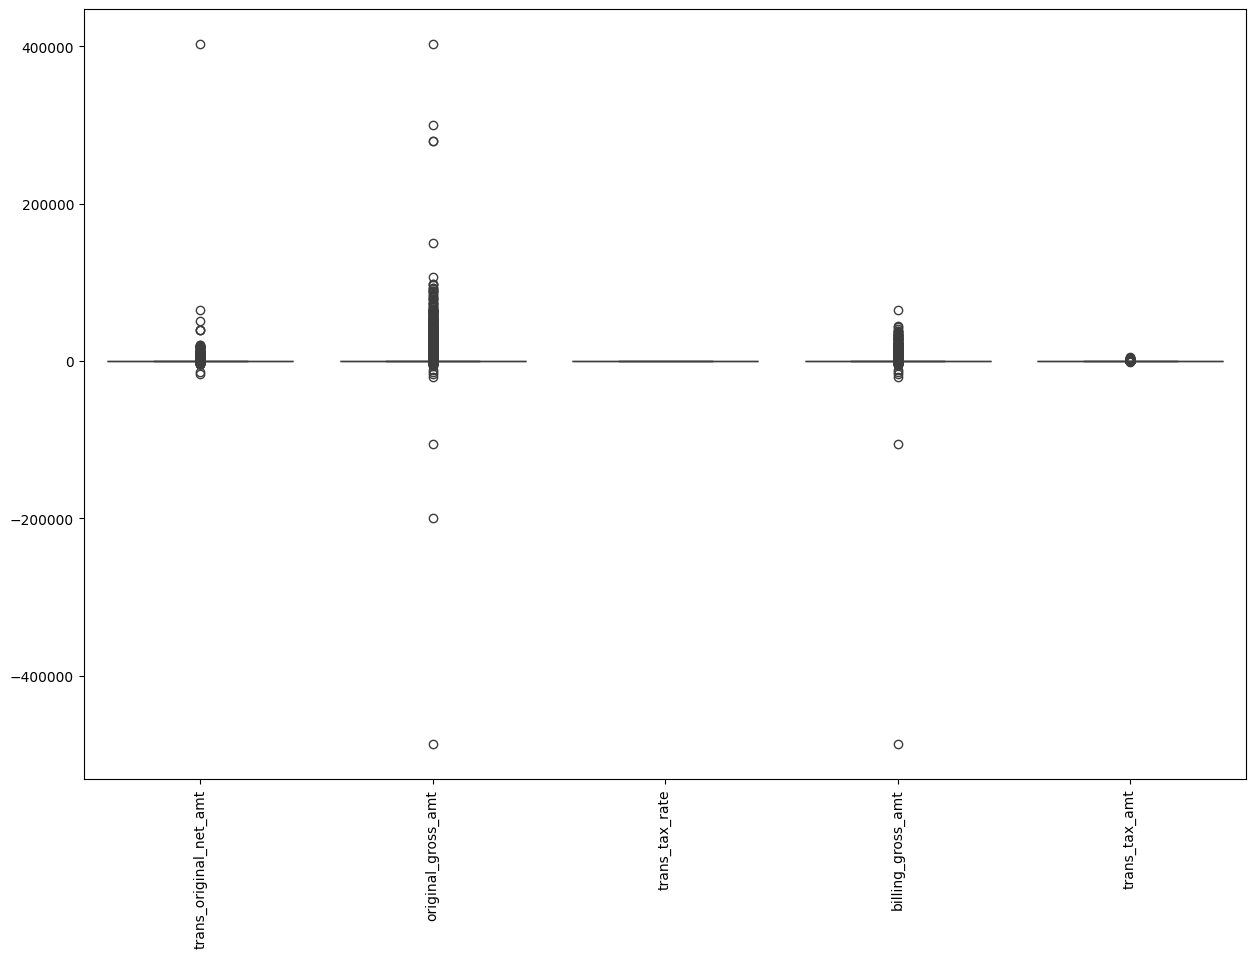

In [99]:
# Boxplot  outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.show()


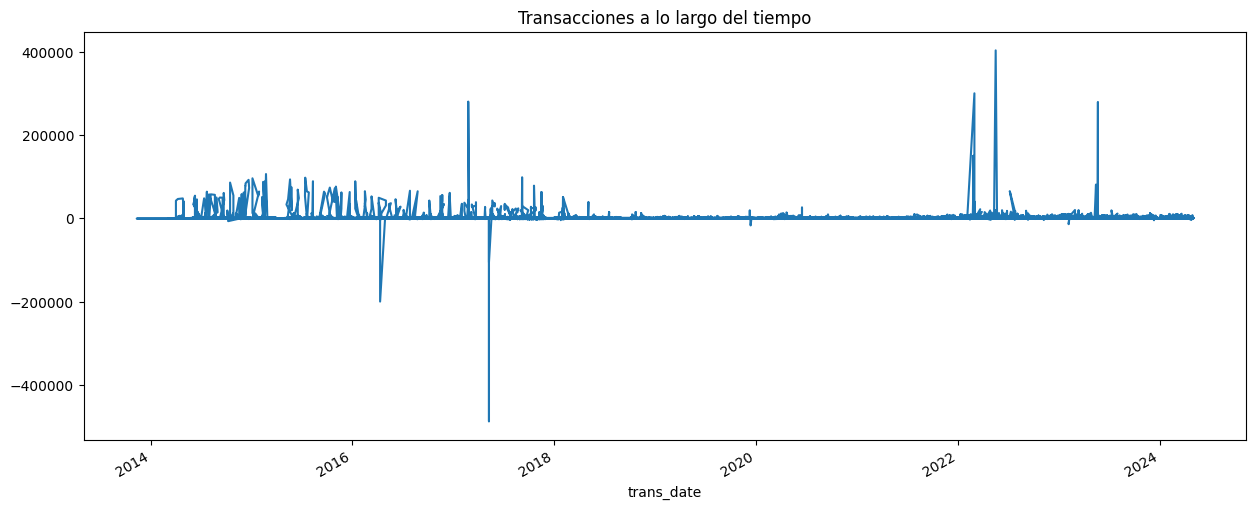

In [100]:

# Transaction time series
df.set_index('trans_date')['original_gross_amt'].plot(figsize=(15, 6))
plt.title('Transacciones a lo largo del tiempo')
plt.show()

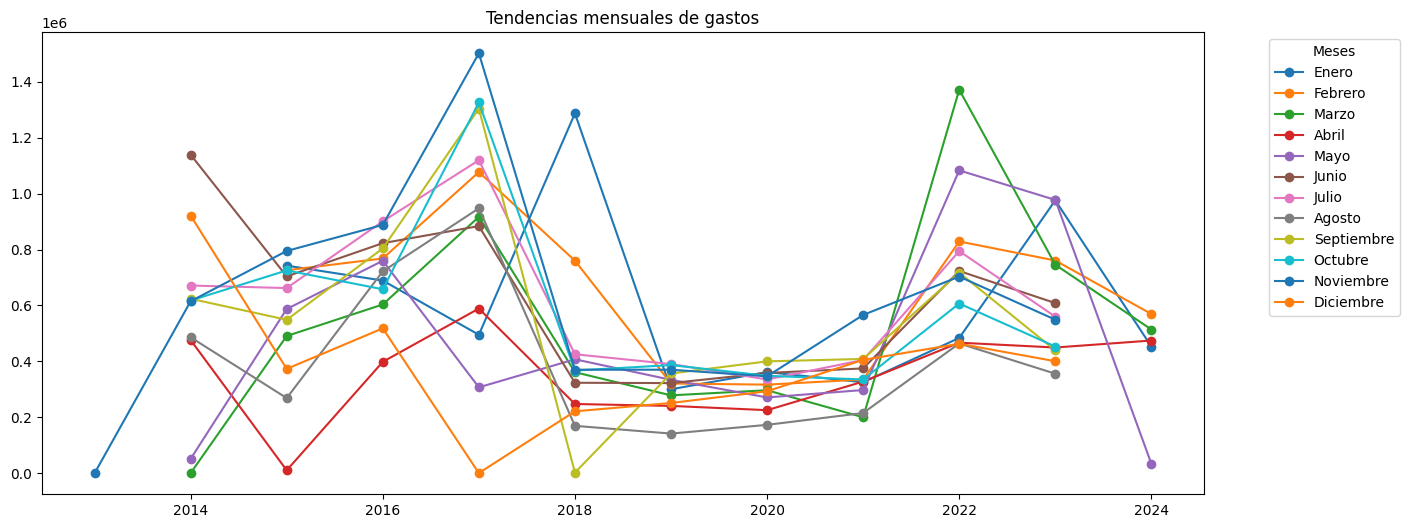

In [111]:
import matplotlib.pyplot as plt

# Create new columns for year and month from the transaction date
df['year'] = df['trans_date'].dt.year
df['month'] = df['trans_date'].dt.month

# Group data by year and month, summing original gross amounts
monthly_trend = df.groupby(['year', 'month']).agg({'original_gross_amt': 'sum'}).unstack()

# Create a dictionary to map month numbers to their names

month_names = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}


# Rename DataFrame columns using month names
monthly_trend.columns = [month_names[col] for col in monthly_trend.columns.droplevel()]

# Plot monthly spending trends with data points
fig, ax = plt.subplots(figsize=(15, 6))
for column in monthly_trend:
    ax.plot(monthly_trend.index, monthly_trend[column], marker='o', label=column)
ax.set_title('Tendencias mensuales de gastos')
ax.legend(title='Meses', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


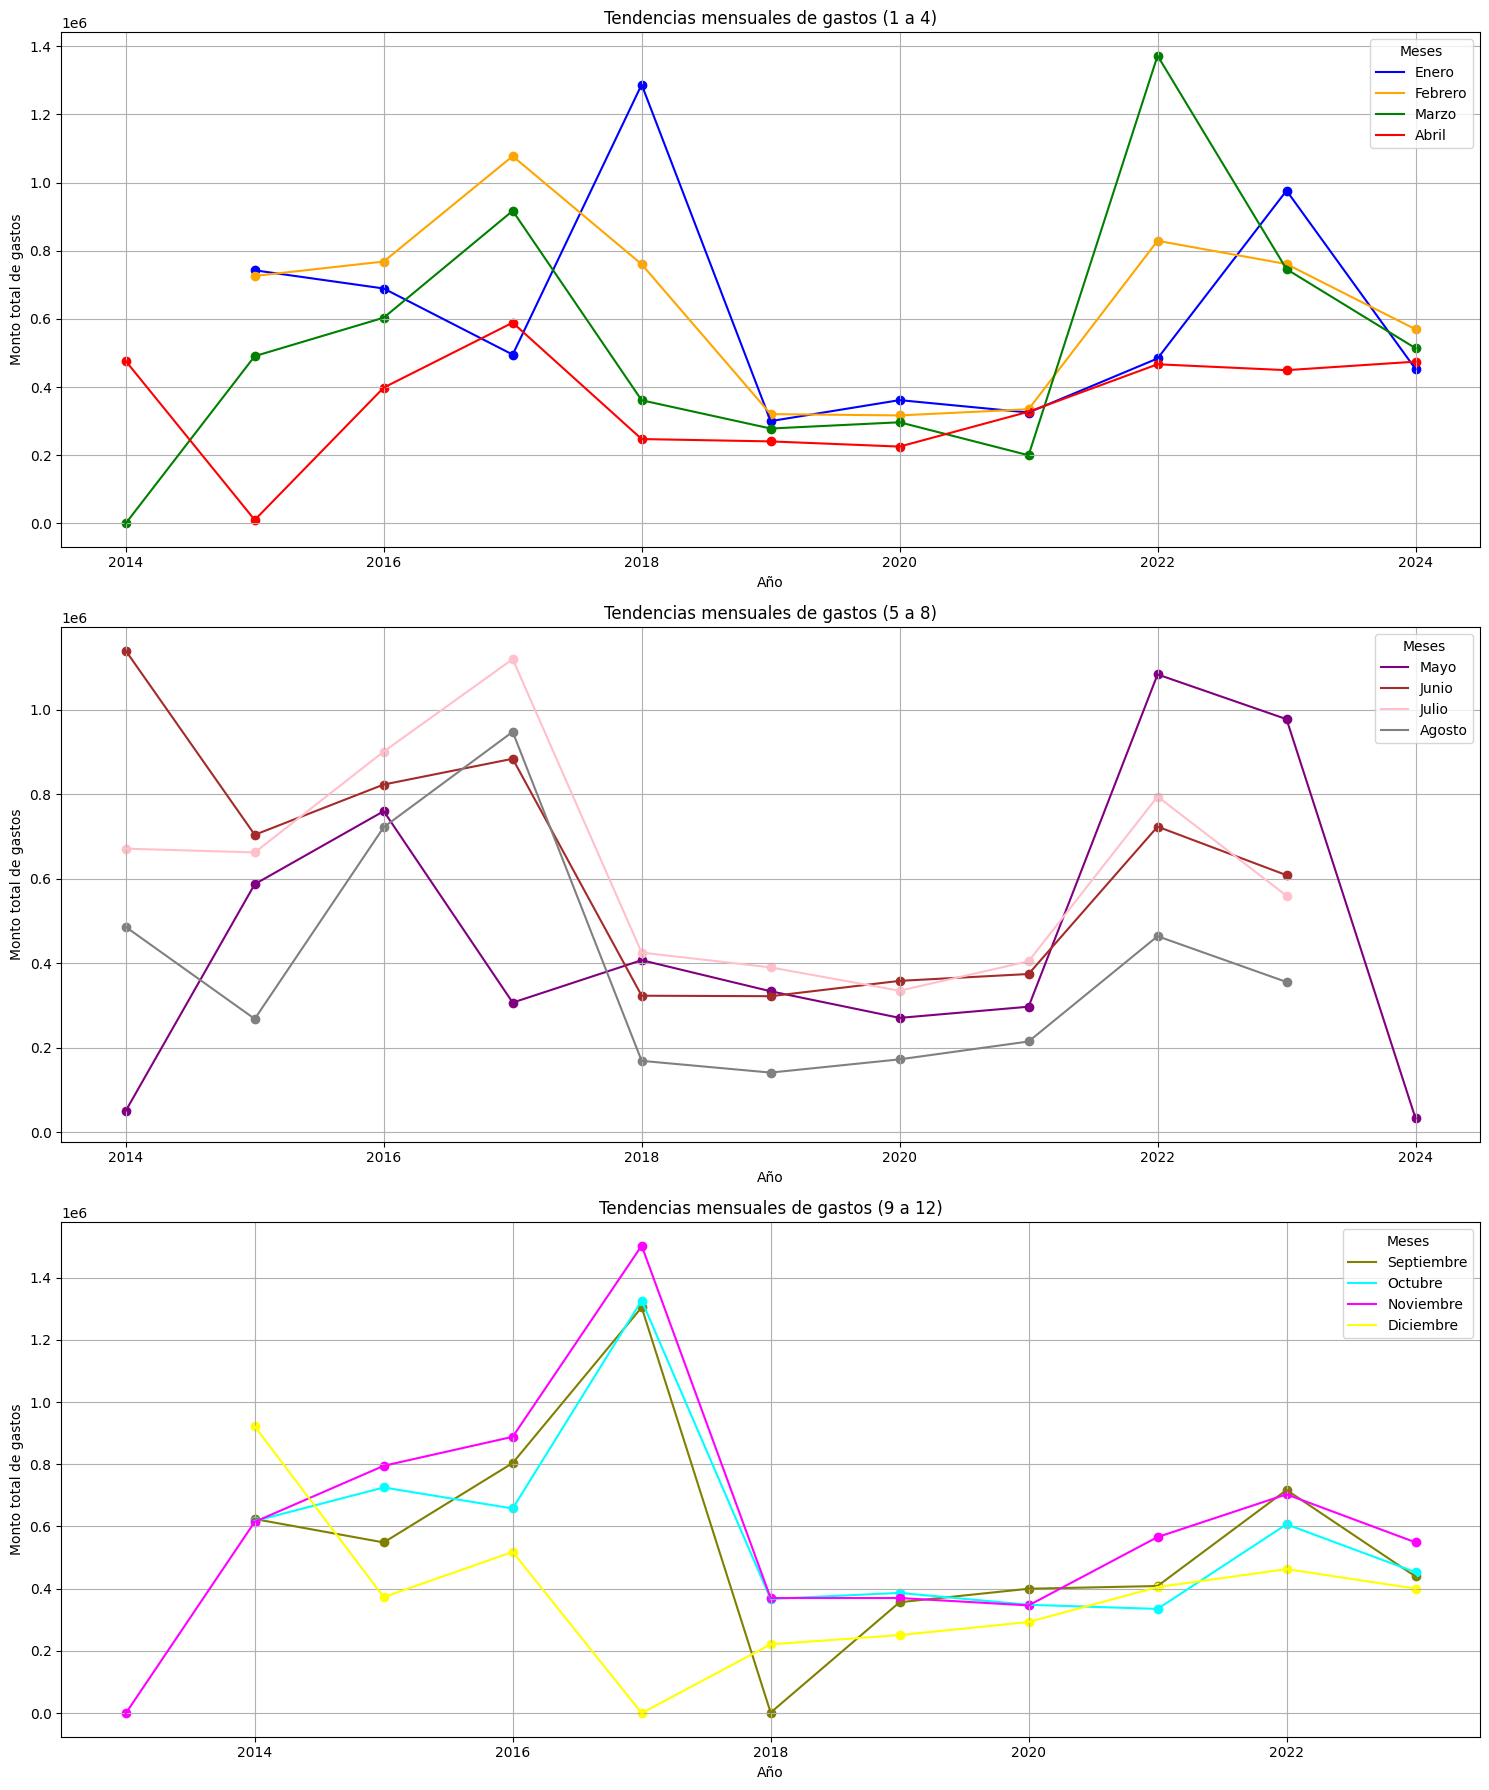

In [117]:
import pandas as pd
import matplotlib.pyplot as plt



df['trans_date'] = pd.to_datetime(df['trans_date'])

# Create new columns for year and months
df['year'] = df['trans_date'].dt.year
df['month'] = df['trans_date'].dt.month

# gropu by year and month
monthly_trend = df.groupby(['year', 'month']).agg({'original_gross_amt': 'sum'}).unstack()

month_names = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

#rename columuns
monthly_trend.columns = [month_names[col] for col in monthly_trend.columns.droplevel()]

# Plot 4 moths intervals 
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# plot
intervals = [(0, 4), (4, 8), (8, 12)]
for i, (start, end) in enumerate(intervals):
    for j, col in enumerate(monthly_trend.columns[start:end]):
        axes[i].plot(monthly_trend.index, monthly_trend[col], label=col, color=colors[start + j])
        axes[i].scatter(monthly_trend.index, monthly_trend[col], color=colors[start + j])
    axes[i].set_title(f'Tendencias mensuales de gastos ({start + 1} a {end})')
    axes[i].legend(title='Meses')
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel('Monto total de gastos')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


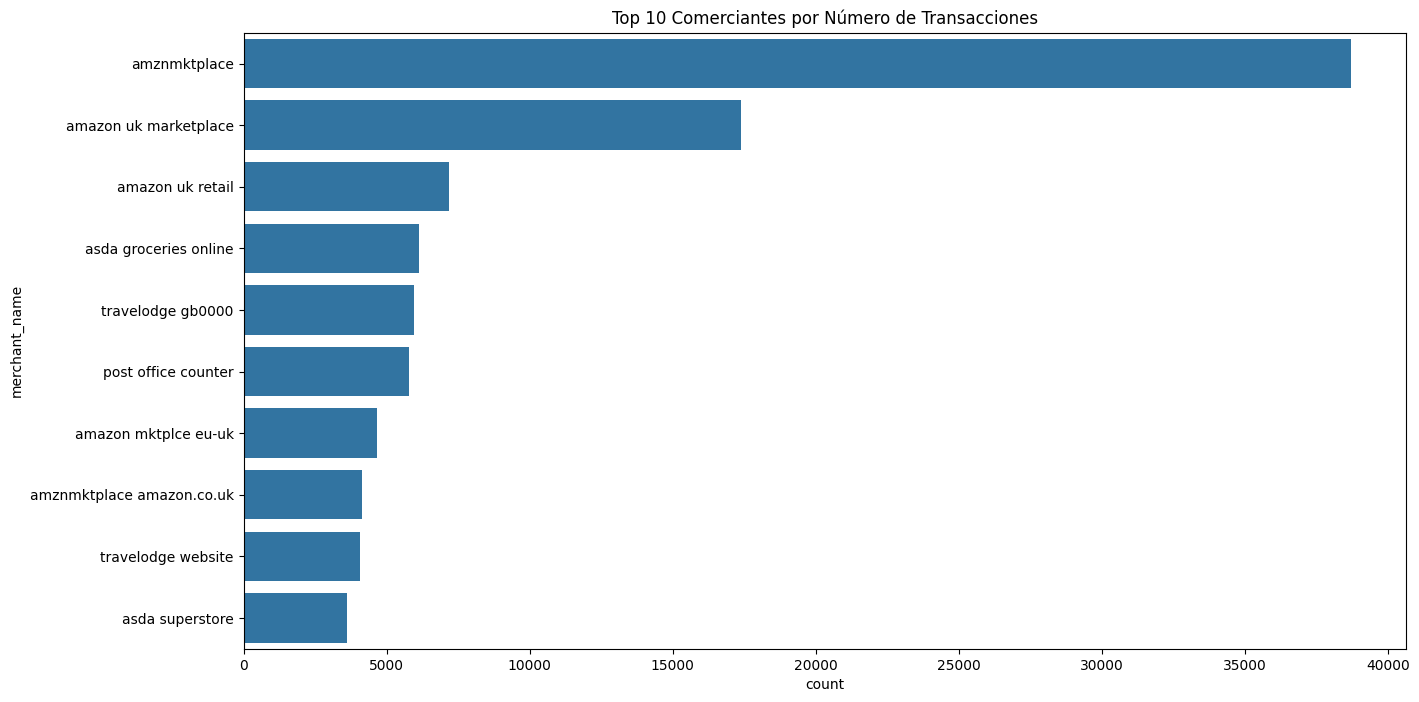

In [102]:
# Transactions by trade category
plt.figure(figsize=(15, 8))
sns.countplot(y='merchant_name', data=df, order=df['merchant_name'].value_counts().iloc[:10].index)
plt.title('Top 10 Comerciantes por Número de Transacciones')
plt.show()




original_gross_amt      4462
trans_tax_rate        352634
billing_gross_amt     159811
trans_tax_amt         265925
dtype: int64


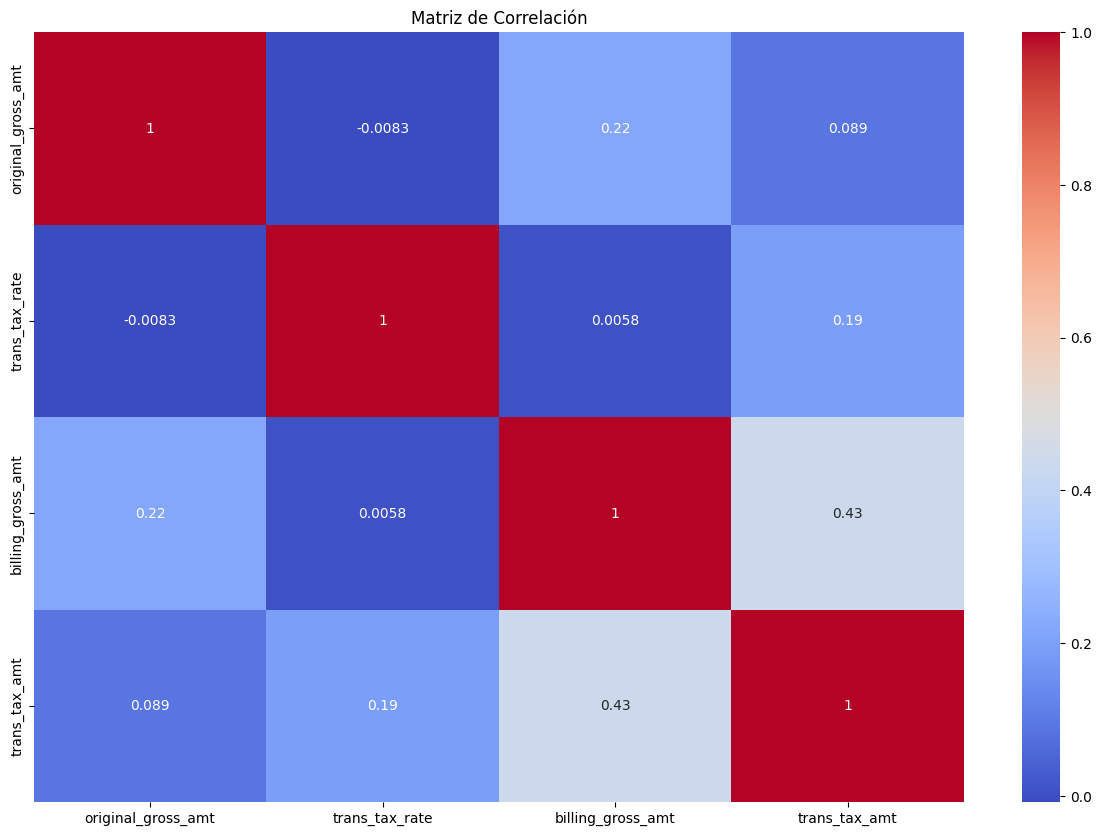

In [123]:
numerical_columns = [ 'original_gross_amt', 'trans_tax_rate', 'billing_gross_amt', 'trans_tax_amt']

# Check if there are many NaN values ​​in the selected columns
print(df[numerical_columns].isnull().sum())

df_clean = df[numerical_columns].dropna()

correlation_matrix = df_clean.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [122]:
# Compare more records to verify if the columns are identical
sample_comparison = df[['trans_original_net_amt', 'original_gross_amt']].dropna().head(50)
print(sample_comparison)

# Check if the columns are identical across the entire dataset
are_identical = df['trans_original_net_amt'].dropna().equals(df['original_gross_amt'].dropna())
print(f"¿Las columnas trans_original_net_amt y original_gross_amt son idénticas? {are_identical}")


        trans_original_net_amt  original_gross_amt
142725                   56.65               56.65
142726                   18.65               18.65
142727                  130.43              130.43
142728                   37.21               37.21
142729                  151.66              151.66
142730                   19.95               19.95
142731                  168.33              168.33
142732                   97.70               97.70
142733                   31.20               31.20
142734                   52.15               52.15
142735                   50.06               60.07
142736                   62.30               74.76
142737                   41.73               50.08
142738                   41.17               49.41
142739                   32.17               38.60
142740                   21.02               25.23
142741                   37.37               44.84
142742                   13.33               16.00
142743                   62.15 

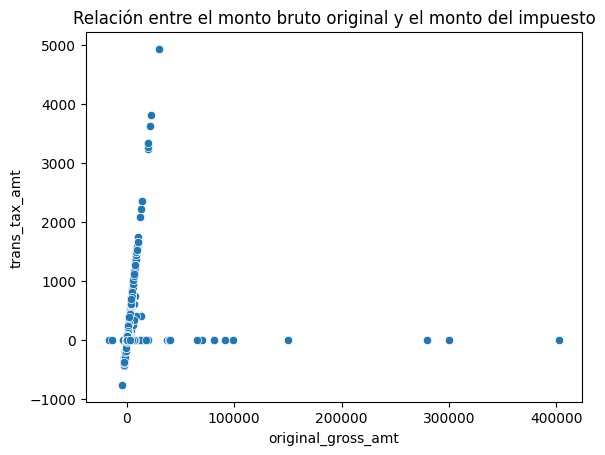

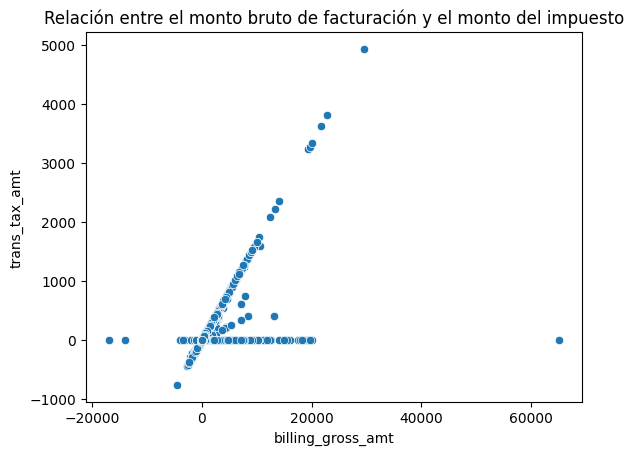

In [67]:
# Visualization of specific relationships between numerical variables
sns.scatterplot(x='original_gross_amt', y='trans_tax_amt', data=df)
plt.title('Relación entre el monto bruto original y el monto del impuesto')
plt.show()

sns.scatterplot(x='billing_gross_amt', y='trans_tax_amt', data=df)
plt.title('Relación entre el monto bruto de facturación y el monto del impuesto')
plt.show()


C:\Users\XMF2858_1\AppData\Local\Temp\ipykernel_13784\65760581.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_ts = df.set_index('trans_date').resample('M').sum()
c:\Users\XMF2858_1\Documents\DS_globandt_test\ds_test\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\XMF2858_1\Documents\DS_globandt_test\ds_test\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\XMF2858_1\Documents\DS_globandt_test\ds_test\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\XMF2858_1\Documents\DS_globandt_test\ds_test\Lib\site-package

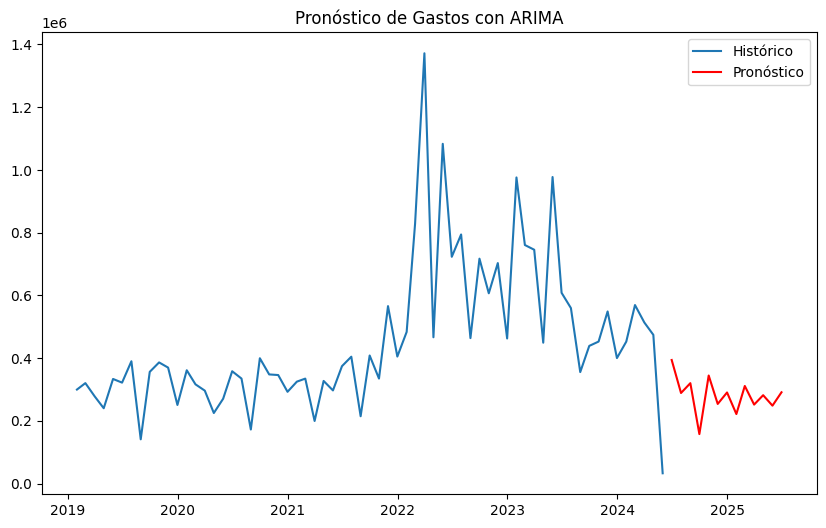

In [136]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Data aggregation by date
df_ts = df.set_index('trans_date').resample('M').sum()

# Filter data from 2019 onwards
df_ts = df_ts[df_ts.index >= '2019-01-01']

# ARIMA model fitting
model = sm.tsa.ARIMA(df_ts['original_gross_amt'], order=(5, 1, 0))
results = model.fit()

# Forecasting
forecast = results.predict(start=len(df_ts), end=len(df_ts) + 12, typ='levels')

# Visualization of the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_ts['original_gross_amt'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Pronostico hastos Arima')
plt.legend()
plt.show()


<Figure size 1500x800 with 0 Axes>

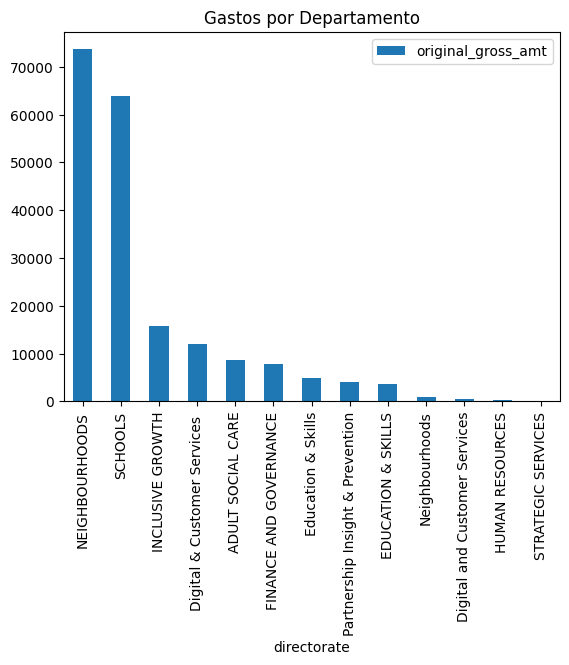

<Figure size 1500x800 with 0 Axes>

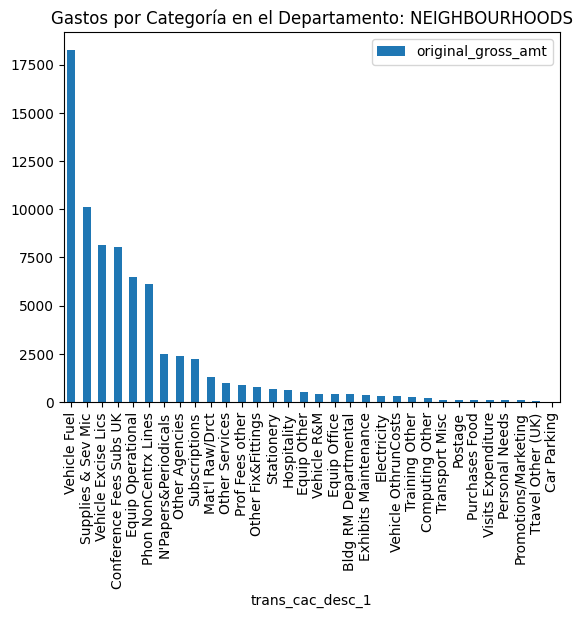

<Figure size 1500x800 with 0 Axes>

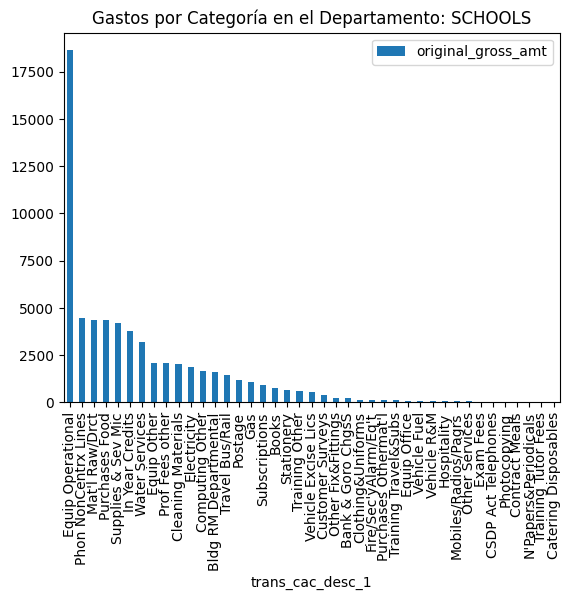

<Figure size 1500x800 with 0 Axes>

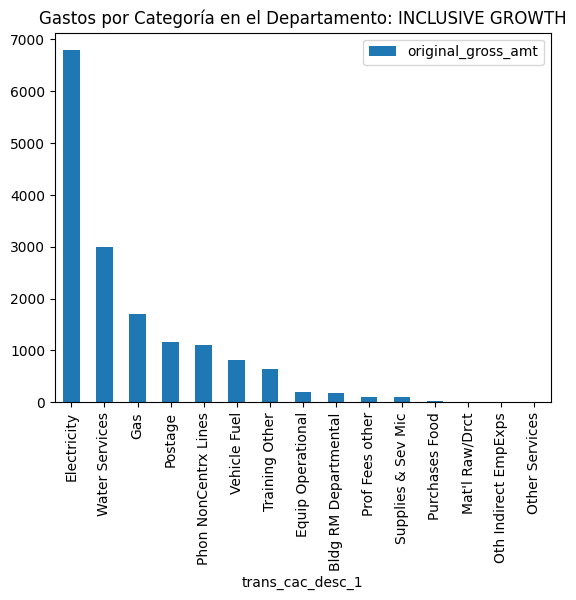

<Figure size 1500x800 with 0 Axes>

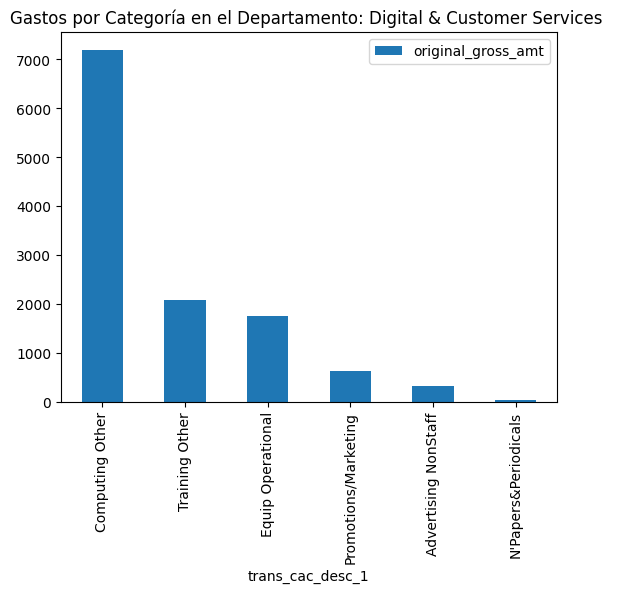

<Figure size 1500x800 with 0 Axes>

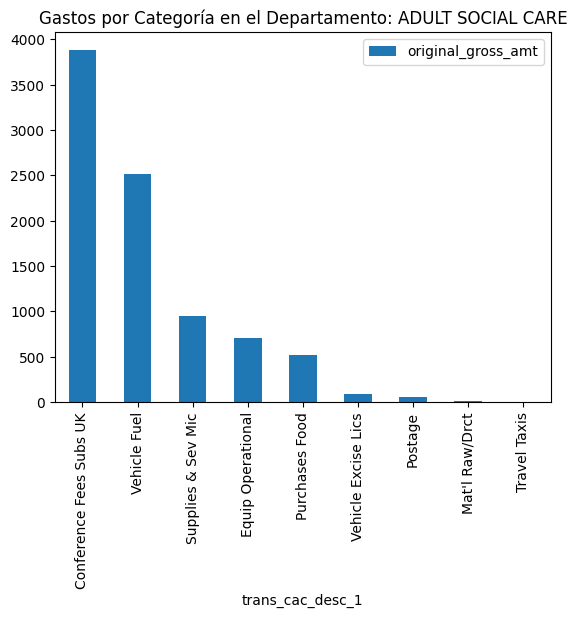

In [22]:
# Analysis of purchasing efficiency by department
department_expenses = df.groupby('directorate').agg({'original_gross_amt': 'sum'}).sort_values(by='original_gross_amt', ascending=False)

# Display of expenses by department
plt.figure(figsize=(15, 8))
department_expenses.plot(kind='bar')
plt.title('Gastos por departamento')
plt.show()

# Identification of expense categories by department
top_departments = department_expenses.index[:5]
for dept in top_departments:
    dept_data = df[df['directorate'] == dept]
    category_expenses = dept_data.groupby('trans_cac_desc_1').agg({'original_gross_amt': 'sum'}).sort_values(by='original_gross_amt', ascending=False)
    plt.figure(figsize=(15, 8))
    category_expenses.plot(kind='bar')
    plt.title(f'Gastos por categoria: {dept}')
    plt.show()
